# MNIST with PyTorch

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
%matplotlib inline

num_samples = 1000
max_iter = 100

## Load and Understand the Data

First, let's load the MNIST dataset. Each image is a 28x28 grid of grayscale pixels.

Shape of one image: (28, 28)


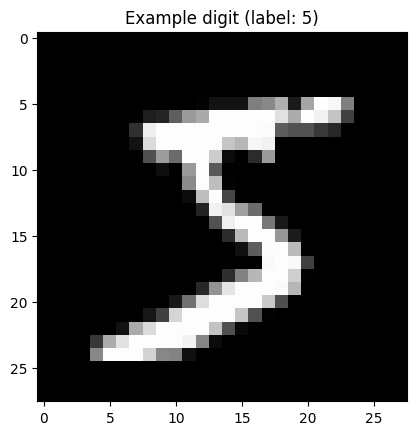

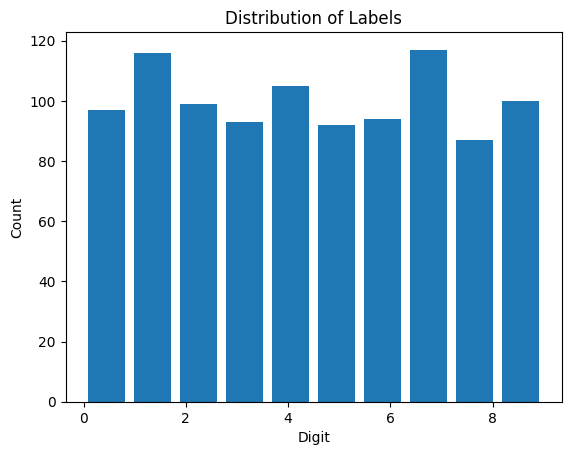

In [2]:
# Load a subset of MNIST to start
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
x_full = mnist.data[:num_samples] / 255.0  # Scale pixel values to [0,1]
x_full = x_full.astype('float32')
y_full = mnist.target[:num_samples].astype(int)

# Look at the shape of one image
single_image = x_full[0].reshape(28, 28)  # Reshape back to 2D
plt.imshow(single_image, cmap='gray')
plt.title(f"Example digit (label: {y_full[0]})")
print("Shape of one image:", single_image.shape)

# Look at the distribution of labels
plt.figure()
plt.hist(y_full, bins=10, rwidth=0.8)
plt.title("Distribution of Labels")
plt.xlabel("Digit")
plt.ylabel("Count");

### Understanding Flattening

To use these images in our model, we need to "flatten" each 28x28 grid into a single vector of 784 numbers:

Shape after flattening: (784,)


Text(0, 0.5, 'Pixel value')

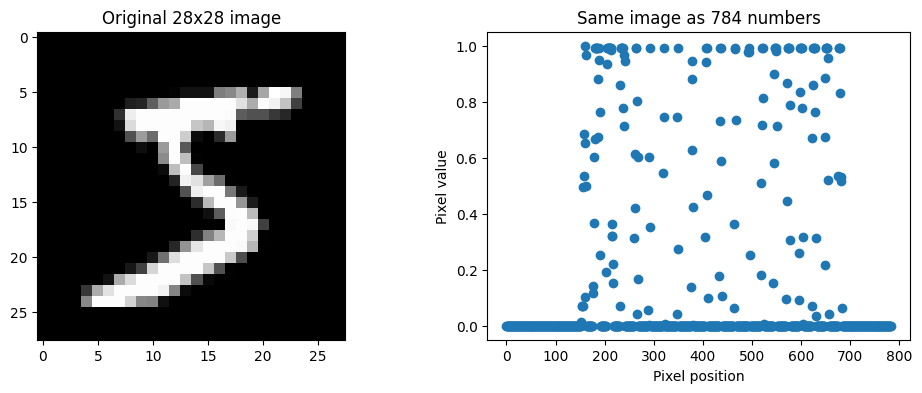

In [3]:
# Demonstrate flattening on one image
flat_image = single_image.reshape(-1)  # -1 means "figure out this dimension"
print("Shape after flattening:", flat_image.shape)

# Visualize how flattening works
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(single_image, cmap='gray')
ax1.set_title("Original 28x28 image")
ax2.scatter(np.arange(784), flat_image)
ax2.set_title("Same image as 784 numbers")
ax2.set_xlabel("Pixel position")
ax2.set_ylabel("Pixel value")

Our dataset `x_full` was already flattened: each row is one flattened image:

In [4]:
print("Full dataset shape:", x_full.shape)
print("Number of training examples:", x_full.shape[0])
print("Number of features per example:", x_full.shape[1])

Full dataset shape: (1000, 784)
Number of training examples: 1000
Number of features per example: 784


### Setting up data loaders

We'll split the data into training and validation sets, and set up PyTorch `DataLoader` objects to feed the data to our model.

In [5]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataLoader objects
train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

## Train an MLP to classify MNIST

We'll use PyTorch to train a simple multi-layer perceptron (MLP) to classify MNIST digits.

You should be able to piece this together from what we've done before!

In [8]:
# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(in_features=784, out_features=32, bias=True)
        self.linear_2 = nn.Linear(in_features=784, out_features=32, bias=True)

    def forward(self, x):
        z1 = (1000, 32)
        a1 = (1000, 32)
        logits = 10
        return logits

# Instantiate the model
input_size = 784
hidden_size = 32
num_classes = 10

model = MLP(input_size, hidden_size, num_classes)

# Training loop!
train_losses = []
val_losses = []

for epoch in range(max_iter):
    train_loss = 0.
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Forward pass
        logits = ...
        # Compute the loss
        loss = F.cross_entropy(logits, y_batch)

        train_loss += loss.item()

        # Backward pass
        # Clear old gradients
        model.zero_grad()
        # Compute the gradients
        loss.backward()
        # Update the weights
        for param in model.parameters():
            param.data -= ... * param.grad
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Compute validation loss
    ...
    for x_val_batch, y_val_batch in val_loader:
        logits = ...
        val_loss += ...
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print(f"Epoch {epoch}: val_loss = {val_loss:.3f}")

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not ellipsis